In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading training dataset
df_train=pd.read_csv('C:/Users/Hp/Desktop/Project-Housing_splitted/train.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
#checking shape of the dataset
df_train.shape

(1168, 81)

In [4]:
#checking data types
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
#checking info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


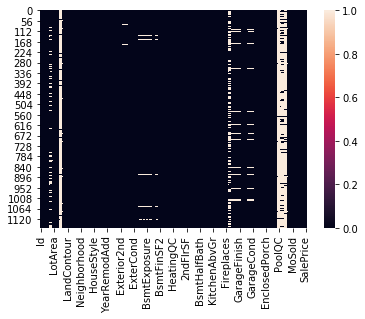

In [6]:
#checking missing values
print(df_train.isnull().sum())
#visualization
sns.heatmap(df_train.isnull())

Many columns having missing values

In [7]:
# printing the object data type columns and their unique values
for column in df_train.columns:
    if df_train[column].dtypes==object:
        print(str(column)+ ':' +str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('**********************************************************************')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
**********************************************************************


Street:['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
**********************************************************************


Alley:[nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64
**********************************************************************


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
**********************************************************************


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
**********************************************************************


Utilities:['AllPub']
AllPub    1168
Name: Utilities, dtype: int64
************************************************

There are no more categories in Utilities column and Condition2.
MiscFeature and Alley having more missing values.

In [8]:
#loading testing dataset
df_test=pd.read_csv('C:/Users/Hp/Desktop/Project-Housing_splitted/test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [9]:
df_test.shape

(292, 80)

### Summary Statistics

In [10]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Observations: 1)large difference in 75% and max value so there are outliers present in the dataset 
2)Most of the data is rightly skewed as mean is greater than median

In [11]:
df_test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   291.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   175.030021   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 38 columns]

In [12]:
def data_analysis(df1,df2):
    train_dtype = []
    train_isnull = []
    train_unique = []
    test_dtype = []
    test_isnull = []
    test_unique = []
    for col in df2.columns:
        train_dtype.append(df1[col].dtypes)
        train_isnull.append(df1[col].isnull().sum())
        train_unique.append(df1[col].unique().shape[0])
        test_dtype.append(df2[col].dtypes)
        test_isnull.append(df2[col].isnull().sum())
        test_unique.append(df2[col].unique().shape[0])

    df= pd.DataFrame({'train_dtype':train_dtype,'test_dtype':test_dtype,'train_isnull':train_isnull,'test_isnull':test_isnull,
                       'train_unique':train_unique,'test_unique':test_unique}, index=df2.columns)
    df.sort_values(['train_isnull'], axis=0, ascending=False, inplace=True)
    return df

In [13]:
data_analysis(df_train,df_test).head(10)

train_dtype test_dtype  train_isnull  test_isnull  train_unique  \
PoolQC           object    float64          1161          292             4   
MiscFeature      object     object          1124          282             5   
Alley            object     object          1091          278             3   
Fence            object     object           931          248             5   
FireplaceQu      object     object           551          139             6   
LotFrontage     float64    float64           214           45           107   
GarageType       object     object            64           17             7   
GarageYrBlt     float64    float64            64           17            98   
GarageQual       object     object            64           17             6   
GarageCond       object     object            64           17             6   

             test_unique  
PoolQC                 1  
MiscFeature            3  
Alley                  3  
Fence                  5  
FireplaceQu            6  
LotFrontage           66  
GarageType             7  
GarageYrBlt           72  
GarageQual             6  
GarageCond             6

In [14]:
col_drop = []
for col in df_test.columns:
    if (df_train[col].isnull().sum() > 45) or (df_test[col].isnull().sum() > 45):
        col_drop.append(col)
df_train.drop(col_drop, axis=1, inplace=True)
df_test.drop(col_drop, axis=1, inplace=True)

In [15]:
#Treating with the missing values and Converting categorical columns into numerical by using label encoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
for col in df_test.columns:
    if df_train[col].unique().shape[0] <= 30:
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        df_test[col].fillna(df_test[col].mode()[0], inplace=True)
        
        df_train[col]= LabelEncoder().fit_transform(df_train[col]) 
        df_test[col]= LabelEncoder().fit_transform(df_test[col]) 

In [16]:
for col in df_test.columns:
    if (df_train[col].isnull().sum() > 0) or (df_test[col].isnull().sum() > 0):
        df_train[col].fillna(df_train[col].median(), inplace=True)
        df_test[col].fillna(df_test[col].median(), inplace=True)

In [17]:
df_train.head()

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0  127          11         3     4928       1         0            3   
1  889           0         3    15865       1         0            3   
2  793           5         3     9920       1         0            3   
3  110           0         3    11751       1         0            3   
4  422           0         3    16635       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          4          1  ...              0          0   
2          0          1          0  ...              0          0   
3          0          4          0  ...              0          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       1       1         8              4   
1          224         0        0       9       1         8              4   
2            0         0        0       5       1         8              4   
3            0         0        0       0       4         0              4   
4            0         0        0       5       3         8              4   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 70 columns]

In [18]:
df_test.head()

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0   337           0         2    14157       1         0            1   
1  1018          11         2     5814       1         0            3   
2   929           0         2    11838       1         3            3   
3  1148           6         2    12000       1         3            0   
4  1227           5         2    14598       1         0            3   

   Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0          0          0          0  ...           51              0   
1          0          1          0  ...            0              0   
2          0          4          0  ...          151              0   
3          0          4          0  ...            0              0   
4          0          1          0  ...           18              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0            0         0        0       6       1         5   
1          0            0         0        0       7       3         0   
2          0            0         0        0       5       3         5   
3          0            0         0        0       6       3         5   
4          0            0         0        0       0       2         5   

   SaleCondition  
0              2  
1              0  
2              2  
3              2  
4              2  

[5 rows x 69 columns]

### DATA EXPLORATION

In [19]:
#checking correlation
df_train.corr()

Id  MSSubClass  MSZoning   LotArea    Street  LotShape  \
Id             1.000000    0.010123  0.009307 -0.029212  0.003613  0.022978   
MSSubClass     0.010123    1.000000  0.013516 -0.120690 -0.029520  0.076645   
MSZoning       0.009307    0.013516  1.000000 -0.023328  0.140215  0.053655   
LotArea       -0.029212   -0.120690 -0.023328  1.000000 -0.263973 -0.189201   
Street         0.003613   -0.029520  0.140215 -0.263973  1.000000 -0.012941   
...                 ...         ...       ...       ...       ...       ...   
MoSold         0.023479    0.005488 -0.051646  0.015141 -0.008860 -0.050418   
YrSold        -0.008853   -0.039245 -0.004964 -0.035399 -0.019635  0.021421   
SaleType       0.024384    0.045454  0.079854  0.005421  0.025920 -0.015161   
SaleCondition -0.014726   -0.033527  0.004501  0.034236  0.014176 -0.054905   
SalePrice     -0.023897   -0.031126 -0.133221  0.249499  0.044753 -0.248171   

               LandContour  Utilities  LotConfig  LandSlope  ...  \
Id               -0.020245        NaN   0.053927   0.007152  ...   
MSSubClass       -0.021033        NaN   0.066929  -0.022919  ...   
MSZoning          0.001175        NaN  -0.027246  -0.023952  ...   
LotArea          -0.159038        NaN  -0.152063   0.395410  ...   
Street            0.105226        NaN   0.000153  -0.141572  ...   
...                    ...        ...        ...        ...  ...   
MoSold           -0.023872        NaN   0.019084   0.030526  ...   
YrSold            0.009499        NaN  -0.009817  -0.005352  ...   
SaleType         -0.041763        NaN  -0.002039   0.056004  ...   
SaleCondition     0.047715        NaN   0.043692  -0.061461  ...   
SalePrice         0.032836        NaN  -0.060452   0.015485  ...   

               EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
Id                  0.004885  -0.013666     0.005169  0.065558  0.016772   
MSSubClass          0.002640  -0.047855    -0.006136  0.019977 -0.030254   
MSZoning            0.111221   0.003334     0.030793 -0.001502  0.011956   
LotArea            -0.007446   0.027290     0.025256  0.050330  0.138730   
Street              0.021360   0.007247     0.016026  0.004069 -0.134283   
...                      ...        ...          ...       ...       ...   
MoSold             -0.036523   0.019804     0.033064 -0.022744  0.018699   
YrSold             -0.005767   0.011001     0.017312 -0.064406  0.020136   
SaleType           -0.008234  -0.021077     0.010760  0.019845  0.010380   
SaleCondition      -0.091563  -0.004518     0.002670 -0.068069  0.012981   
SalePrice          -0.115004   0.065189     0.100284  0.098578 -0.028946   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
Id             0.023479 -0.008853  0.024384      -0.014726  -0.023897  
MSSubClass     0.005488 -0.039245  0.045454      -0.033527  -0.031126  
MSZoning      -0.051646 -0.004964  0.079854       0.004501  -0.133221  
LotArea        0.015141 -0.035399  0.005421       0.034236   0.249499  
Street        -0.008860 -0.019635  0.025920       0.014176   0.044753  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.144536 -0.063667      -0.003462   0.072764  
YrSold        -0.144536  1.000000  0.013606       0.024505  -0.045508  
SaleType      -0.063667  0.013606  1.000000       0.143557  -0.050851  
SaleCondition -0.003462  0.024505  0.143557       1.000000   0.217687  
SalePrice      0.072764 -0.045508 -0.050851       0.217687   1.000000  

[70 rows x 70 columns]

In [20]:
#removing skewness
for col in df_train.columns:
    if df_train[col].skew()>0.55:
        df_train[col]=np.log1p(df_train[col])

In [21]:
#Again checking the skewness
df_train.skew()

Id                0.026526
MSSubClass       -0.169015
MSZoning         -1.796785
LotArea          -0.169107
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         0.073610
Length: 70, dtype: float64

In [22]:
#Checking skewness
df_train.skew()

Id                0.026526
MSSubClass       -0.169015
MSZoning         -1.796785
LotArea          -0.169107
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         0.073610
Length: 70, dtype: float64

In [23]:
col_continues = []
for col in df_test.columns:
    if df_train[col].unique().shape[0] >= (df_train.shape[0])//10:
        col_continues.append(col)
print(col_continues)

['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


### Univariate Analysis

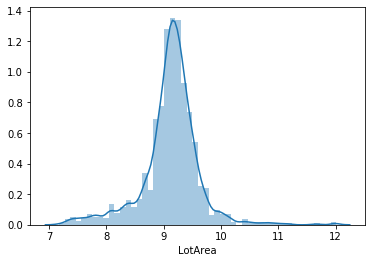

In [24]:
sns.distplot(df_train['LotArea'])

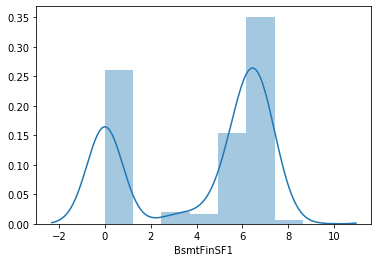

In [25]:
sns.distplot(df_train['BsmtFinSF1'])

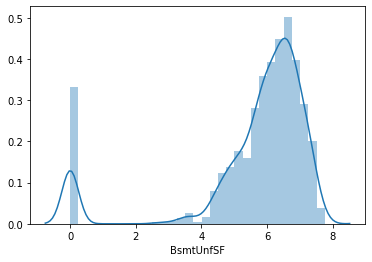

In [26]:
sns.distplot(df_train['BsmtUnfSF'])

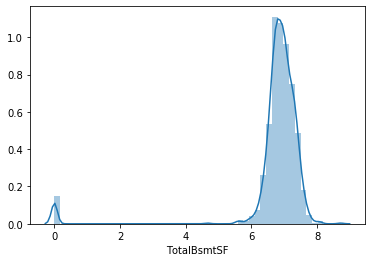

In [27]:
sns.distplot(df_train['TotalBsmtSF'])

### Bivariate Analysis

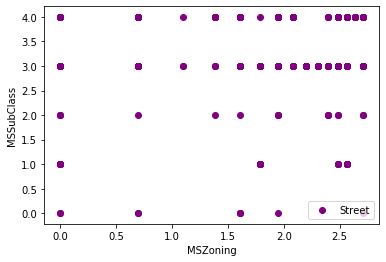

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df_train['MSSubClass'],df_train['MSZoning'],color='purple',label='Street')
plt.ylabel('MSSubClass')
plt.xlabel('MSZoning')
plt.legend()
plt.show()

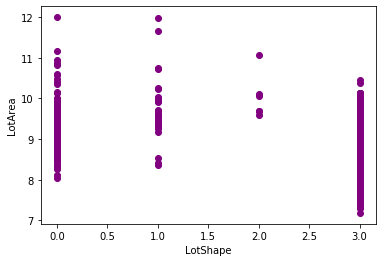

In [38]:
plt.scatter(df_train['LotShape'],df_train['LotArea'],color='purple')
plt.ylabel('LotArea')
plt.xlabel('LotShape')
plt.show()

lotshape with label 2 varries less with lotarea.
lotshape with label 0 and 3 varries more with lotarea


Text(0, 0.5, 'SalePrice')

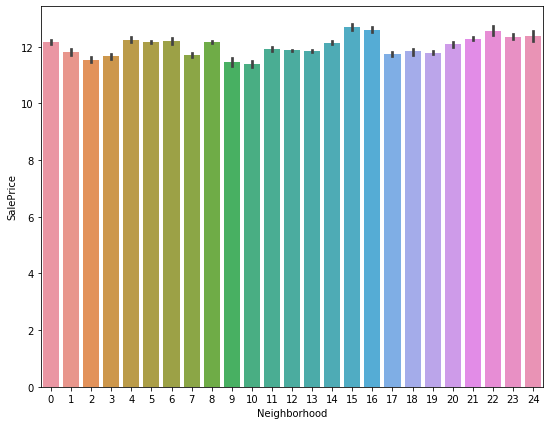

In [42]:
plt.figure(figsize=(9,7))
sns.barplot(y='SalePrice',x='Neighborhood',data=df_train)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

Saleprice is maximum with label 15 in Neighborhood followed by 16

Text(0, 0.5, 'OverallCond')

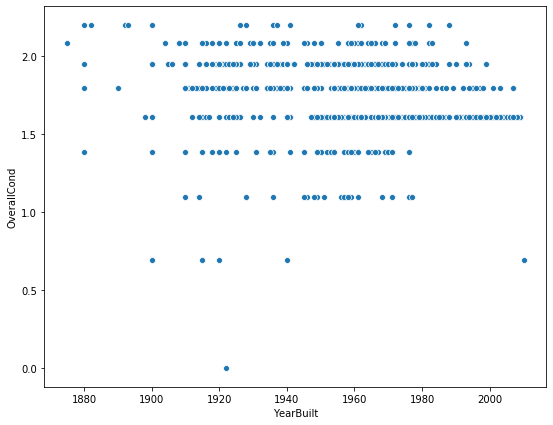

In [44]:
plt.figure(figsize=(9,7))
sns.scatterplot(y='OverallCond',x='YearBuilt',data=df_train)
plt.xlabel('YearBuilt')
plt.ylabel('OverallCond')

## Model Development

In [29]:
Y_train = df_train['SalePrice'].values
X_train = df_train.drop(['Id','SalePrice'], axis = 1)
X_test = df_test.drop(['Id'], axis = 1)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(1168, 68) (1168,)
(292, 68)


In [30]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

In [31]:
x_train, x_test, y_train, y_test = train_test_split( X_train, Y_train, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (934, 68) (934,)
Test set: (234, 68) (234,)


In [32]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm  
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)

print('Train set mse:', mean_squared_error(y_train, lr.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, lr.predict(x_test)))
print('Test set score:', lr.score(x_test,y_test))

Train set mse: 0.01467314425057983
Test set mse: 0.028758337999529586
Test set score: 0.8164821367004981


In [33]:
rfr = RandomForestRegressor(n_estimators = 1000)
rfr.fit(x_train,y_train)

print('Train set mse:', mean_squared_error(y_train, rfr.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, rfr.predict(x_test)))
print('Test set score:', rfr.score(x_test,y_test))

Train set mse: 0.0030010929558857
Test set mse: 0.0196868405782454
Test set score: 0.8743708027182717


In [34]:
GBR = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=1000)
GBR.fit(x_train,y_train)

print('Train set mse:', mean_squared_error(y_train, GBR.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, GBR.predict(x_test)))
print('Test set score:', GBR.score(x_test,y_test))

Train set mse: 0.00013242515935808107
Test set mse: 0.01716292836605025
Test set score: 0.8904768439069228


In [47]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(r2_score(y_test,predad))
print('mean squared error:',mean_squared_error(y_test,predad))

0.8271721524183738
mean squared error: 0.027083149112150092


Among all Gradient boosting regressor model is working well

## Hyperparameter Tunning

In [35]:
from sklearn.model_selection import RandomizedSearchCV
model = GradientBoostingRegressor()
params={ 'learning_rate'    : [0.05, 0.10, 0.15],
         'max_depth'        : [3, 4, 5, 6, 8, 10, 12, 15],
         'n_estimators'     : [100, 500, 1000]}

random_search = RandomizedSearchCV(model, params, cv=5)
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)
print(random_search.best_params_)
print(random_search.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.05}
0.8776971162382641


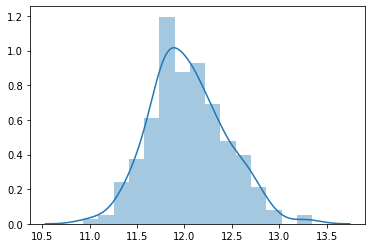

In [55]:
sns.distplot(y_test)

As the curve is guassian ,predictions are pretty much good.

### Cross Validation of Gradient Boosting

In [51]:
from sklearn.model_selection import cross_val_score
gbrscores=cross_val_score(GBR,X_train,Y_train,cv=10)
print(gbrscores)
print(gbrscores.mean())

[0.91920008 0.93575154 0.89639308 0.79797069 0.90195269 0.86165509
 0.88696921 0.91571565 0.87357584 0.84493641]
0.8834120285725678


In [48]:
#Lets save GradientBoostingRegressor model 
from sklearn.externals import joblib
joblib.dump(GBR,'housing project.pkl')

['housing project.pkl']